In [1]:
#Importing Libraries

#import sys
#!{sys.executable} -m pip install pandas
import pandas as pd
#import sys
#!{sys.executable} -m pip install numpy
import numpy as np
#import sys
#!{sys.executable} -m pip install seaborn
import seaborn; seaborn.set()
#import sys
#!{sys.executable} -m pip install scikit-learn
from sklearn.metrics import mean_squared_error
#import sys
#!{sys.executable} -m pip install matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = 15,6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA

In [2]:
data = pd.read_csv("/Users/priyaramasamy/Downloads/GC=F.csv")

In [3]:
print(data.head())

         Date         Open         High          Low        Close  \
0  2010-01-04  1117.699951  1122.300049  1097.099976  1117.699951   
1  2010-01-05  1118.099976  1126.500000  1115.000000  1118.099976   
2  2010-01-06  1135.900024  1139.199951  1120.699951  1135.900024   
3  2010-01-07  1133.099976  1133.099976  1129.199951  1133.099976   
4  2010-01-08  1138.199951  1138.199951  1122.699951  1138.199951   

     Adj Close  Volume  
0  1117.699951   184.0  
1  1118.099976    53.0  
2  1135.900024   363.0  
3  1133.099976    56.0  
4  1138.199951    54.0  


In [4]:
print(data.tail())

            Date         Open         High          Low        Close  \
3337  2020-12-24          NaN          NaN          NaN          NaN   
3338  2020-12-27          NaN          NaN          NaN          NaN   
3339  2020-12-28  1895.500000  1895.800049  1873.699951  1877.199951   
3340  2020-12-29  1881.300049  1881.300049  1879.699951  1879.699951   
3341  2020-12-30  1879.900024  1895.800049  1877.300049  1891.000000   

        Adj Close  Volume  
3337          NaN     NaN  
3338          NaN     NaN  
3339  1877.199951    75.0  
3340  1879.699951   343.0  
3341  1891.000000   444.0  


In [5]:
data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3342 entries, 0 to 3341
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3342 non-null   object 
 1   Open       2744 non-null   float64
 2   High       2744 non-null   float64
 3   Low        2744 non-null   float64
 4   Close      2744 non-null   float64
 5   Adj Close  2744 non-null   float64
 6   Volume     2744 non-null   float64
dtypes: float64(6), object(1)
memory usage: 182.9+ KB


In [7]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2744.000000,2744.000000,2744.000000,2744.000000,2744.000000,2744.000000
mean,1385.614249,1392.685460,1377.912646,1385.445262,1385.445262,5686.939504
std,214.355452,216.373390,212.087208,214.276023,214.276023,30515.982240
min,1052.199951,1062.000000,1045.199951,1050.800049,1050.800049,0.000000
25%,1230.350006,1236.149963,1225.674957,1230.225037,1230.225037,39.000000
50%,1310.400024,1315.349976,1305.800049,1309.900024,1309.900024,140.000000
75%,1543.824951,1550.724976,1531.575043,1542.400024,1542.400024,455.250000
max,2045.500000,2063.000000,2040.000000,2051.500000,2051.500000,386334.000000


In [8]:
data = pd.read_csv("/Users/priyaramasamy/Downloads/GC=F.csv",index_col='Date')
print(data.head(5))
data.info()
data.index = pd.to_datetime(data.index)
print(data.index)
data.head(5)

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2010-01-04  1117.699951  1122.300049  1097.099976  1117.699951  1117.699951   
2010-01-05  1118.099976  1126.500000  1115.000000  1118.099976  1118.099976   
2010-01-06  1135.900024  1139.199951  1120.699951  1135.900024  1135.900024   
2010-01-07  1133.099976  1133.099976  1129.199951  1133.099976  1133.099976   
2010-01-08  1138.199951  1138.199951  1122.699951  1138.199951  1138.199951   

            Volume  
Date                
2010-01-04   184.0  
2010-01-05    53.0  
2010-01-06   363.0  
2010-01-07    56.0  
2010-01-08    54.0  
<class 'pandas.core.frame.DataFrame'>
Index: 3342 entries, 2010-01-04 to 2020-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2744 non-null   float64
 1   High       2744 non-null   float64
 2   Low        2744 no

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,1117.699951,1122.300049,1097.099976,1117.699951,1117.699951,184.0
2010-01-05,1118.099976,1126.500000,1115.000000,1118.099976,1118.099976,53.0
2010-01-06,1135.900024,1139.199951,1120.699951,1135.900024,1135.900024,363.0
2010-01-07,1133.099976,1133.099976,1129.199951,1133.099976,1133.099976,56.0
2010-01-08,1138.199951,1138.199951,1122.699951,1138.199951,1138.199951,54.0


In [9]:
data = data.sort_index()
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,1117.699951,1122.300049,1097.099976,1117.699951,1117.699951,184.0
2010-01-05,1118.099976,1126.500000,1115.000000,1118.099976,1118.099976,53.0
2010-01-06,1135.900024,1139.199951,1120.699951,1135.900024,1135.900024,363.0
2010-01-07,1133.099976,1133.099976,1129.199951,1133.099976,1133.099976,56.0
2010-01-08,1138.199951,1138.199951,1122.699951,1138.199951,1138.199951,54.0


In [10]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-24,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-27,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-28,1895.500000,1895.800049,1873.699951,1877.199951,1877.199951,75.0
2020-12-29,1881.300049,1881.300049,1879.699951,1879.699951,1879.699951,343.0
2020-12-30,1879.900024,1895.800049,1877.300049,1891.000000,1891.000000,444.0


In [11]:
data.shape

(3342, 6)

In [12]:
gold = data.dropna()

In [13]:
gold.shape

(2744, 6)

In [14]:
gold.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,1117.699951,1122.300049,1097.099976,1117.699951,1117.699951,184.0
2010-01-05,1118.099976,1126.500000,1115.000000,1118.099976,1118.099976,53.0
2010-01-06,1135.900024,1139.199951,1120.699951,1135.900024,1135.900024,363.0
2010-01-07,1133.099976,1133.099976,1129.199951,1133.099976,1133.099976,56.0
2010-01-08,1138.199951,1138.199951,1122.699951,1138.199951,1138.199951,54.0


In [15]:
gold.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-22,1882.199951,1882.199951,1861.000000,1866.599976,1866.599976,233.0
2020-12-23,1867.000000,1878.800049,1864.500000,1874.699951,1874.699951,82.0
2020-12-28,1895.500000,1895.800049,1873.699951,1877.199951,1877.199951,75.0
2020-12-29,1881.300049,1881.300049,1879.699951,1879.699951,1879.699951,343.0
2020-12-30,1879.900024,1895.800049,1877.300049,1891.000000,1891.000000,444.0


Text(0, 0.5, 'Daily Gold Price')

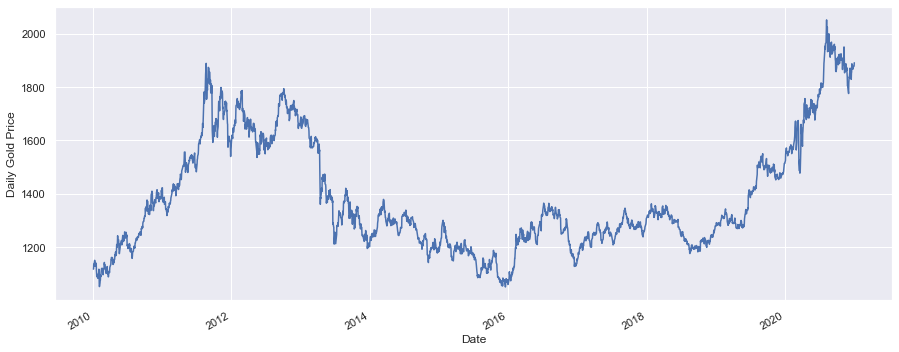

In [16]:
gold['Close'].plot()
plt.ylabel("Daily Gold Price")

In [17]:
data = gold['Close']

In [18]:
data.head()

Date
2010-01-04    1117.699951
2010-01-05    1118.099976
2010-01-06    1135.900024
2010-01-07    1133.099976
2010-01-08    1138.199951
Name: Close, dtype: float64

In [19]:
data.tail()

Date
2020-12-22    1866.599976
2020-12-23    1874.699951
2020-12-28    1877.199951
2020-12-29    1879.699951
2020-12-30    1891.000000
Name: Close, dtype: float64

Text(0, 0.5, 'Weekly Gold Price')

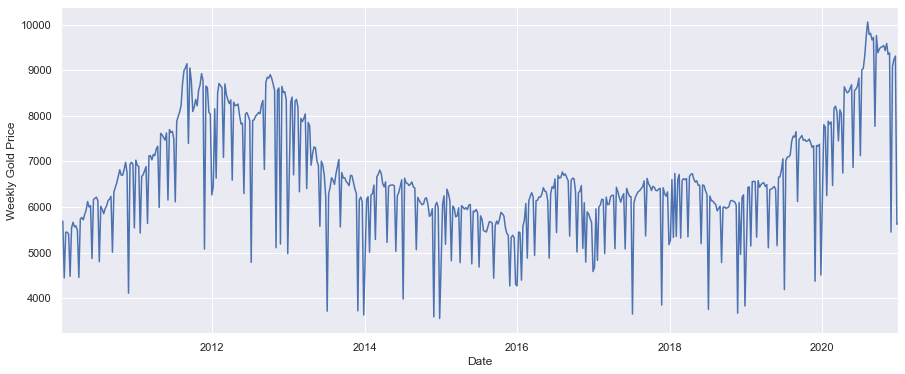

In [20]:
weekly = data.resample('W').sum()
weekly.plot()
plt.ylabel("Weekly Gold Price")

<AxesSubplot:xlabel='Date'>

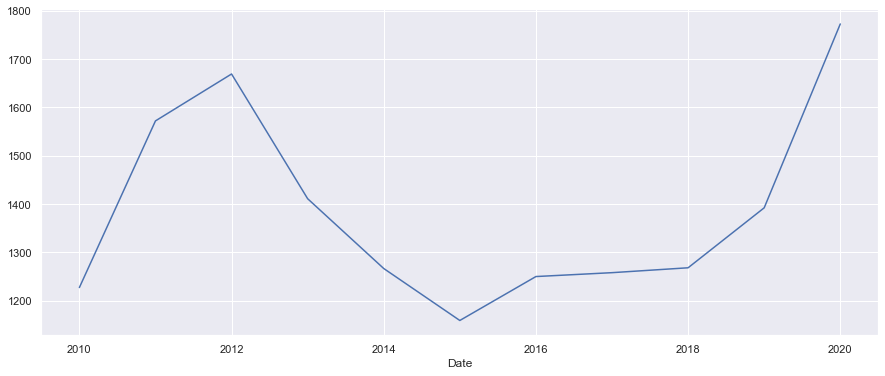

In [21]:
by_year = data.groupby(data.index.year).mean()
by_year.plot()

<AxesSubplot:>

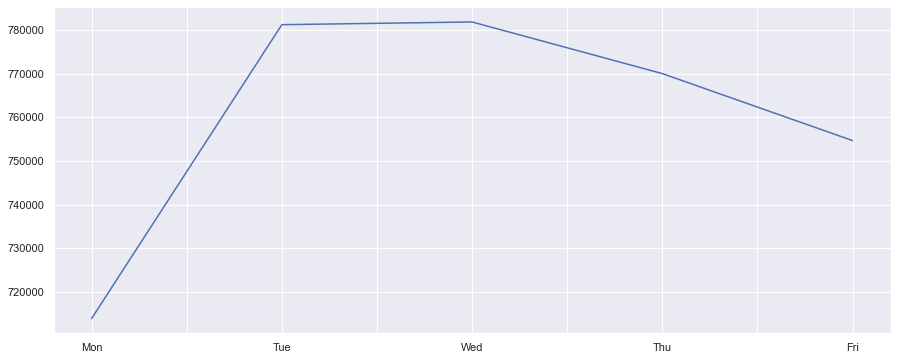

In [22]:
by_weekday = data.groupby(data.index.dayofweek).sum()
by_weekday.index = ['Mon','Tue','Wed','Thu','Fri']
by_weekday.plot()

<AxesSubplot:xlabel='Date'>

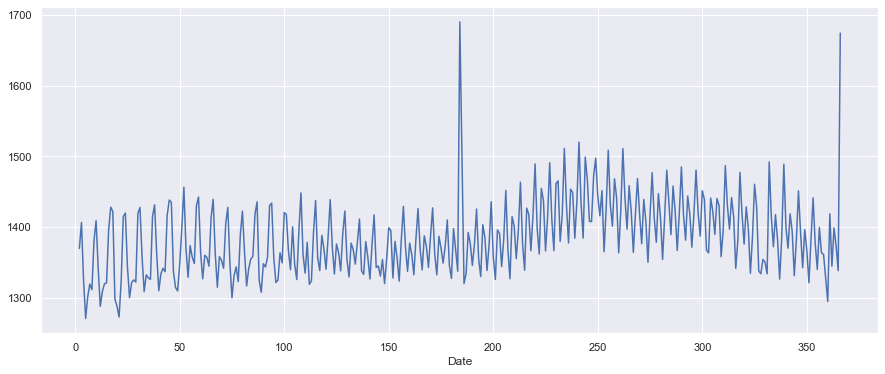

In [23]:
by_day = data.groupby(data.index.dayofyear).mean()
by_day.plot()

<AxesSubplot:xlabel='Date'>

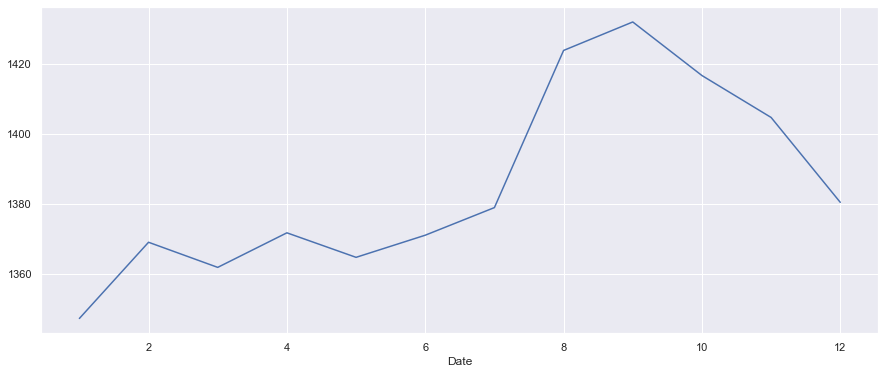

In [24]:
by_month = data.groupby(data.index.month).mean()
by_month.plot()

<AxesSubplot:xlabel='Date'>

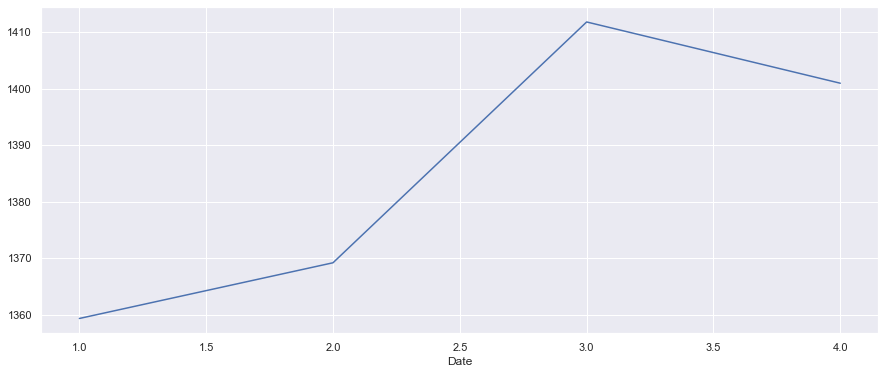

In [25]:
by_quarter = data.groupby(data.index.quarter).mean()
by_quarter.plot()

Date
1    AxesSubplot(0.125,0.2;0.775x0.68)
2    AxesSubplot(0.125,0.2;0.775x0.68)
3    AxesSubplot(0.125,0.2;0.775x0.68)
4    AxesSubplot(0.125,0.2;0.775x0.68)
Name: Close, dtype: object

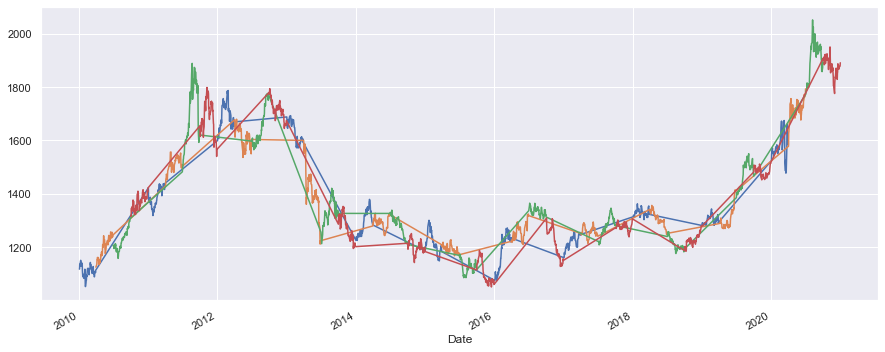

In [26]:
by_quarter = data.groupby(data.index.quarter)
by_quarter.plot()

<AxesSubplot:xlabel='Date'>

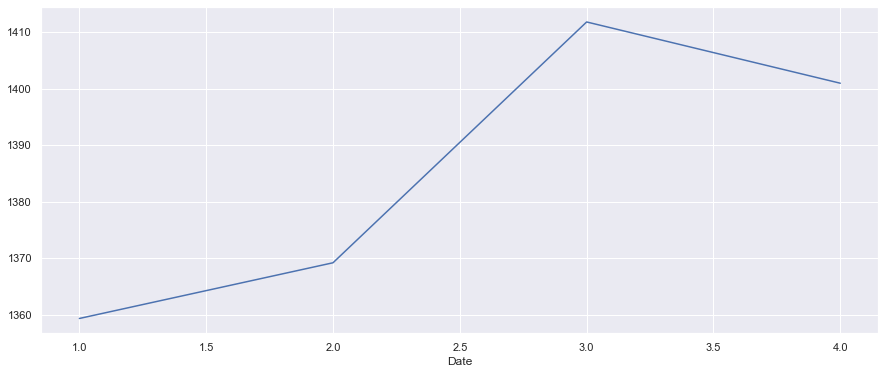

In [27]:
by_quarter_overall = data.groupby(data.index.quarter).mean()
by_quarter_overall.plot()

<AxesSubplot:title={'center':'weekdays'}, xlabel='Date'>

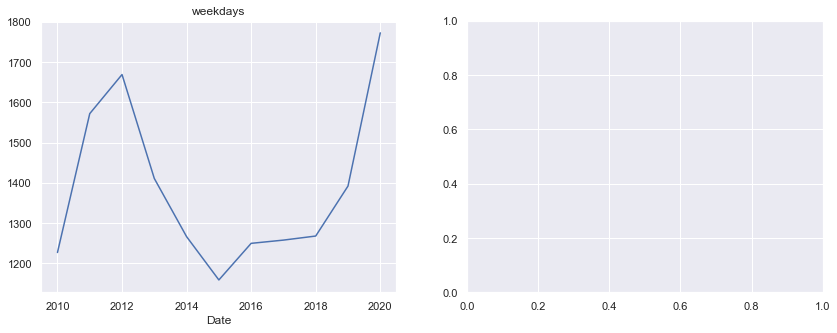

In [28]:
weekend = np.where(data.index.weekday < 5, 'weekday', 'weekend')
by_time = data.groupby([weekend, data.index.year]).mean()
fig, ax = plt.subplots(1, 2, figsize = (14,5))
by_time.loc['weekday'].plot(ax=ax[0], title='weekdays')
#by_time.loc['weekend'].plot(ax=ax[1], title='weekends')

In [29]:
ts = data

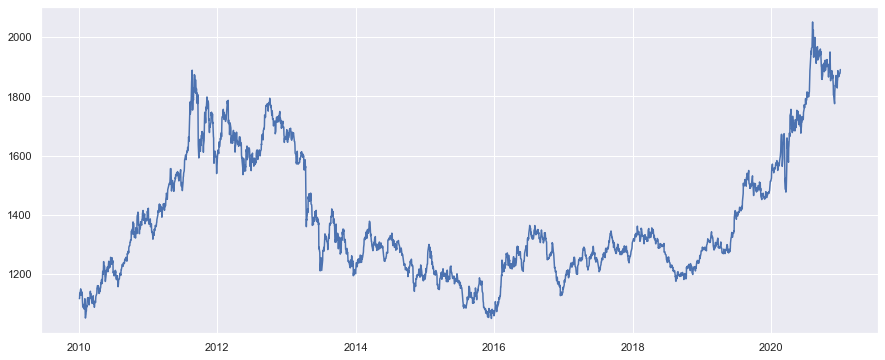

In [30]:
plt.plot(ts)

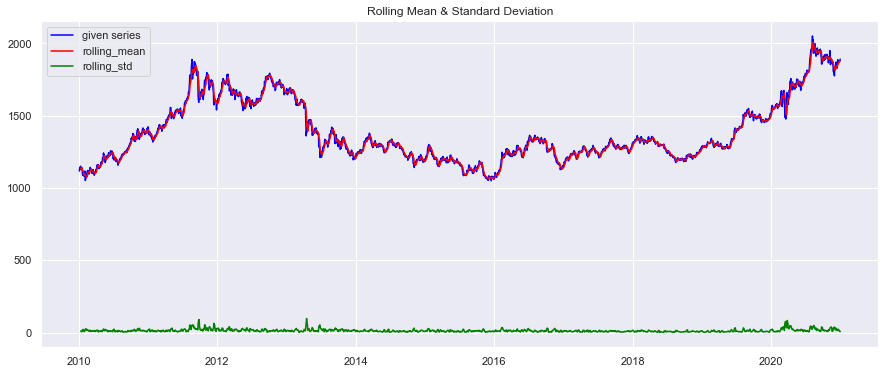

Result of Dickey-Fuller Test:
Test Statistic                  -1.134139
p-value                          0.701268
#lags Used                       9.000000
Number of observation used    2734.000000
Critical value (1%)             -3.432744
Critical value (5%)             -2.862598
Critical value (10%)            -2.567333
dtype: float64


In [31]:
from statsmodels.tsa.stattools import adfuller
def test_for_stationary(input_data):
    r_mean = input_data.rolling(window = 7, center = False).mean()
    r_std = input_data.rolling(window = 7, center = False).std()
    
    #plotting the data
    given = plt.plot(input_data, color = 'blue', label = 'given series')
    rolling_mean = plt.plot(r_mean, color = 'red', label = 'rolling_mean')
    rolling_std = plt.plot(r_std, color = 'green', label = 'rolling_std')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block = False)
    
    #perform Dickey-Fuller test
    print('Result of Dickey-Fuller Test:')
    dftest = adfuller(input_data)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#lags Used','Number of observation used'])
    for key, value in dftest[4].items():
        dfoutput['Critical value (%s)'%key] = value
    print(dfoutput)
   
test_for_stationary(ts)

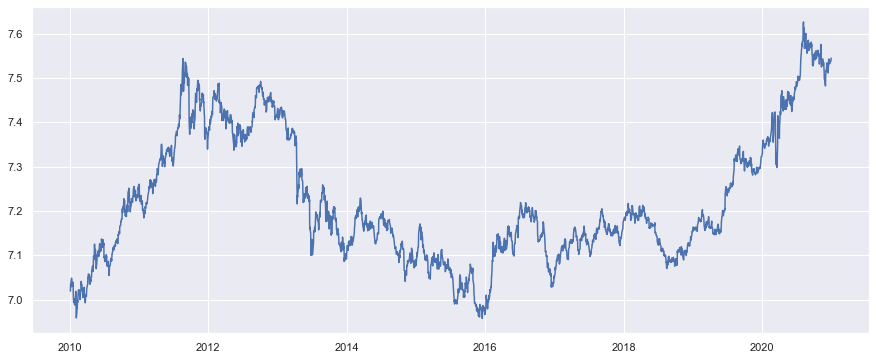

In [32]:
ts_logtransformed = np.log(ts)
plt.plot(ts_logtransformed)

In [33]:
ts_logtransformed.head(10)

Date
2010-01-04    7.019028
2010-01-05    7.019386
2010-01-06    7.035181
2010-01-07    7.032712
2010-01-08    7.037203
2010-01-11    7.048126
2010-01-12    7.028999
2010-01-13    7.035621
2010-01-14    7.041062
2010-01-15    7.030061
Name: Close, dtype: float64

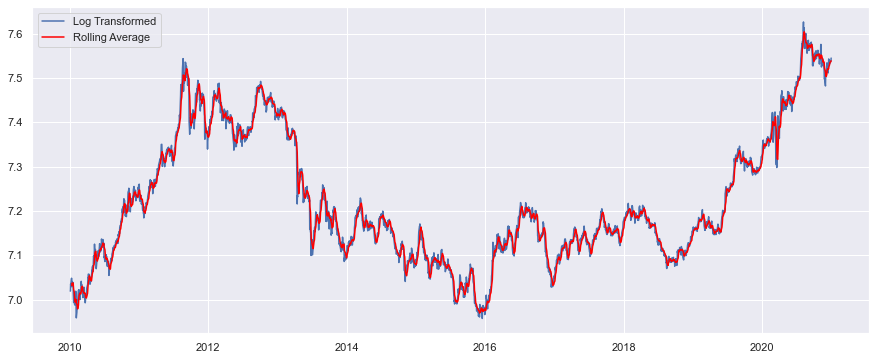

In [34]:
Rolling_average = ts_logtransformed.rolling(window = 7, center = False).mean()
plt.plot(ts_logtransformed, label = 'Log Transformed')
plt.plot(Rolling_average, color = 'red', label = 'Rolling Average')
plt.legend(loc = 'best')

In [35]:
Rolling_average.head(10)

Date
2010-01-04         NaN
2010-01-05         NaN
2010-01-06         NaN
2010-01-07         NaN
2010-01-08         NaN
2010-01-11         NaN
2010-01-12    7.031519
2010-01-13    7.033890
2010-01-14    7.036986
2010-01-15    7.036255
Name: Close, dtype: float64

In [36]:
log_rolling_difference = ts_logtransformed - Rolling_average
log_rolling_difference.head(10)
log_rolling_difference.tail(10)

Date
2020-12-15    0.003470
2020-12-16    0.005957
2020-12-17    0.021327
2020-12-18    0.016607
2020-12-21    0.009645
2020-12-22    0.000852
2020-12-23    0.001633
2020-12-28    0.001058
2020-12-29    0.000584
2020-12-30    0.006290
Name: Close, dtype: float64

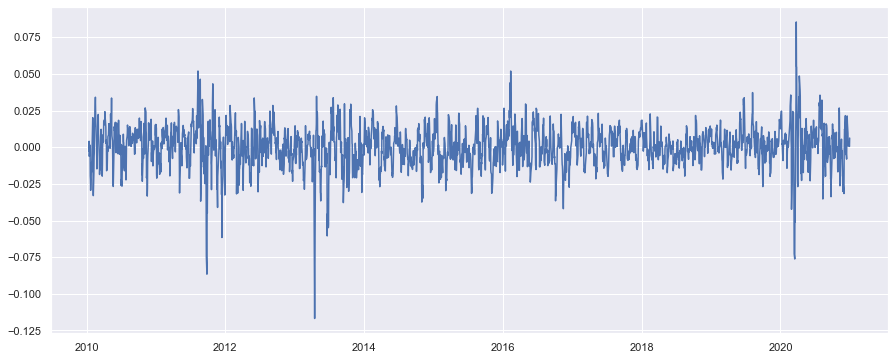

In [37]:
log_rolling_difference.dropna(inplace = True)
plt.plot(log_rolling_difference)

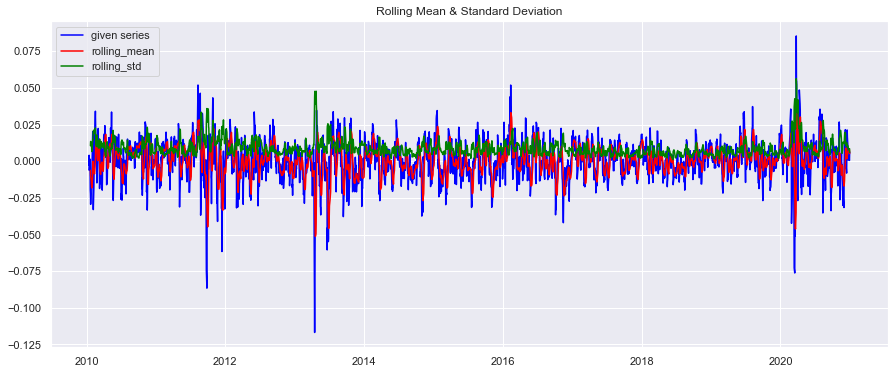

Result of Dickey-Fuller Test:
Test Statistic               -1.498436e+01
p-value                       1.149678e-27
#lags Used                    9.000000e+00
Number of observation used    2.728000e+03
Critical value (1%)          -3.432749e+00
Critical value (5%)          -2.862600e+00
Critical value (10%)         -2.567334e+00
dtype: float64


In [38]:
test_for_stationary(log_rolling_difference)

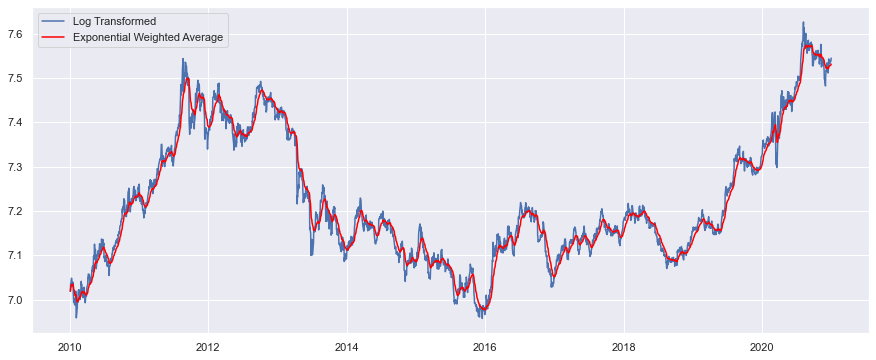

In [39]:
expweighted_avg = ts_logtransformed.ewm(halflife = 7, min_periods = 0, adjust = True, ignore_na = False).mean()
plt.plot(ts_logtransformed, label = 'Log Transformed')
plt.plot(expweighted_avg, color = 'red', label = 'Exponential Weighted Average')
plt.legend(loc = 'best')

In [40]:
expweighted_avg.head(10)

Date
2010-01-04    7.019028
2010-01-05    7.019216
2010-01-06    7.025072
2010-01-07    7.027275
2010-01-08    7.029672
2010-01-11    7.033556
2010-01-12    7.032696
2010-01-13    7.033200
2010-01-14    7.034457
2010-01-15    7.033797
Name: Close, dtype: float64

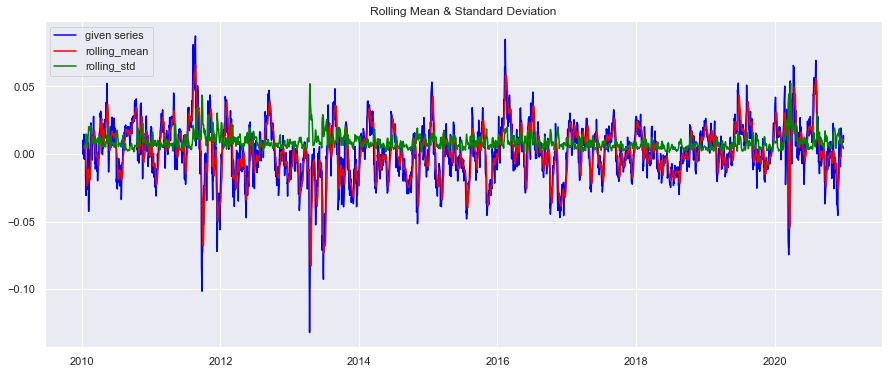

Result of Dickey-Fuller Test:
Test Statistic               -1.255997e+01
p-value                       2.113191e-23
#lags Used                    0.000000e+00
Number of observation used    2.743000e+03
Critical value (1%)          -3.432736e+00
Critical value (5%)          -2.862594e+00
Critical value (10%)         -2.567331e+00
dtype: float64


In [41]:
log_expmovwt_diff = ts_logtransformed - expweighted_avg
test_for_stationary(log_expmovwt_diff)

<AxesSubplot:xlabel='Date'>

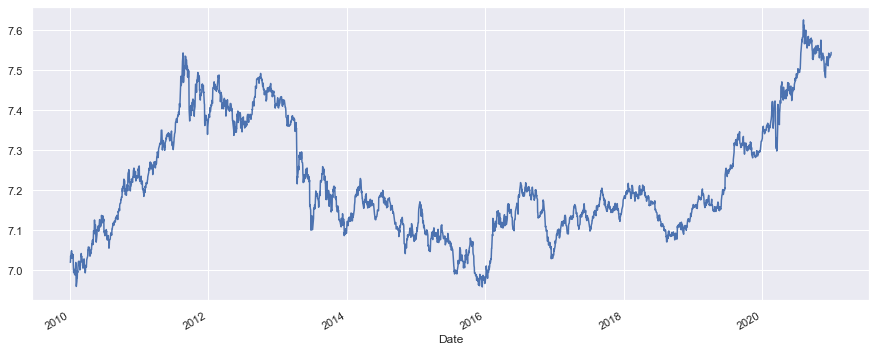

In [42]:
ts_logtransformed.plot()

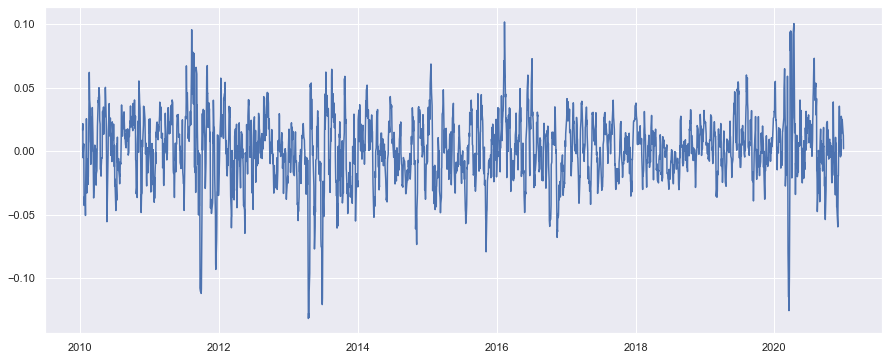

In [43]:
ts_diff_logtrans = ts_logtransformed - ts_logtransformed.shift(7)
plt.plot(ts_diff_logtrans)

In [44]:
ts_diff_logtrans.head(10)

Date
2010-01-04         NaN
2010-01-05         NaN
2010-01-06         NaN
2010-01-07         NaN
2010-01-08         NaN
2010-01-11         NaN
2010-01-12         NaN
2010-01-13    0.016592
2010-01-14    0.021676
2010-01-15   -0.005119
Name: Close, dtype: float64

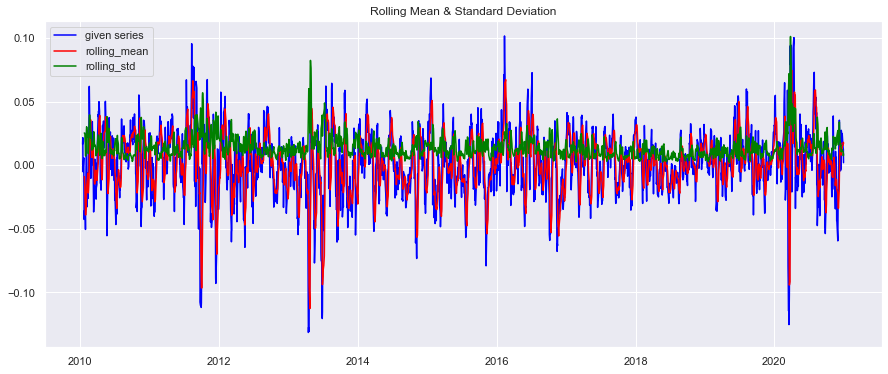

Result of Dickey-Fuller Test:
Test Statistic               -8.725874e+00
p-value                       3.289889e-14
#lags Used                    2.800000e+01
Number of observation used    2.708000e+03
Critical value (1%)          -3.432767e+00
Critical value (5%)          -2.862608e+00
Critical value (10%)         -2.567338e+00
dtype: float64


In [45]:
ts_diff_logtrans.dropna(inplace = True)
test_for_stationary(ts_diff_logtrans)

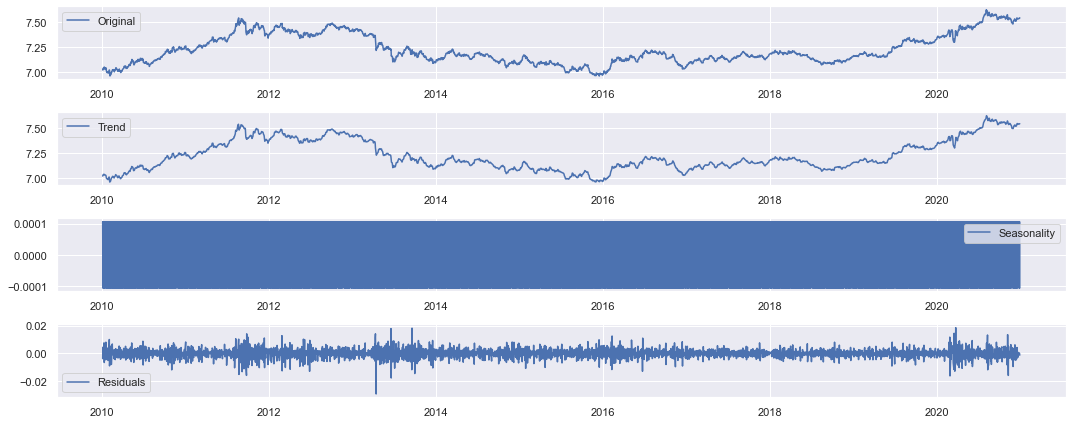

In [46]:
decomposition = seasonal_decompose(ts_logtransformed, period=2)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_logtransformed, label = 'Original')
plt.legend(loc = 'best')
plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')
plt.subplot(413)
plt.plot(seasonal, label = 'Seasonality')
plt.legend(loc = 'best')
plt.subplot(414)
plt.plot(residual, label = 'Residuals')
plt.legend(loc = 'best')
plt.tight_layout()

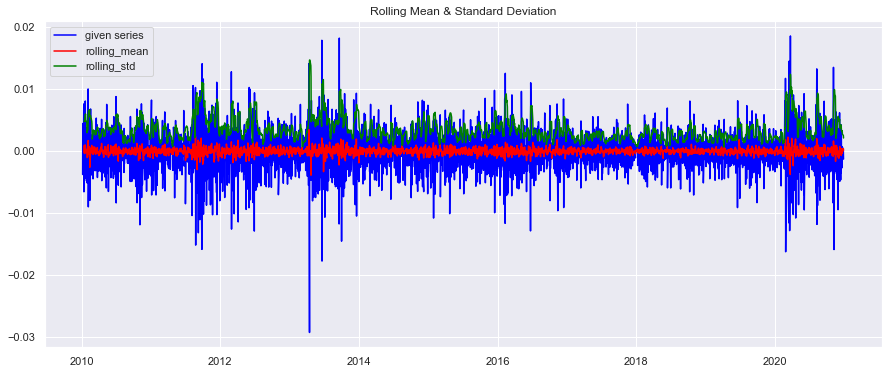

Result of Dickey-Fuller Test:
Test Statistic               -1.790053e+01
p-value                       2.954539e-30
#lags Used                    2.700000e+01
Number of observation used    2.714000e+03
Critical value (1%)          -3.432762e+00
Critical value (5%)          -2.862606e+00
Critical value (10%)         -2.567337e+00
dtype: float64


In [47]:
decomposed_TS = residual
decomposed_TS.dropna(inplace = True)
test_for_stationary(decomposed_TS)

In [48]:
lag_acf = acf(ts_diff_logtrans, nlags = 30)
lag_pacf = pacf(ts_diff_logtrans, nlags = 50, method = 'ols')

/usr/local/Cellar/jupyterlab/3.0.0_1/libexec/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


Text(0.5, 1.0, 'AutoCorrelation Function')

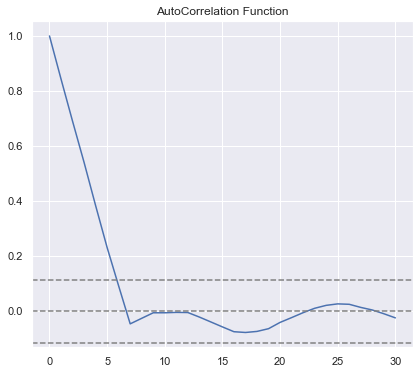

In [49]:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-5.96/np.sqrt(len(ts_diff_logtrans)), linestyle='--', color='gray')
plt.axhline(y=5.96/np.sqrt(len(ts_diff_logtrans)), linestyle='--', color='gray')
plt.title('AutoCorrelation Function')

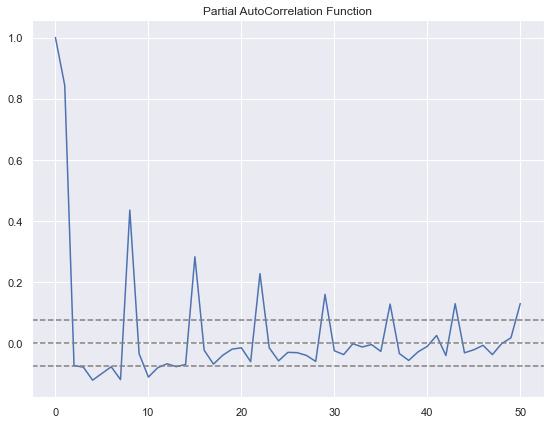

In [50]:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-3.96/np.sqrt(len(ts_diff_logtrans)), linestyle='--', color='gray')
plt.axhline(y=3.96/np.sqrt(len(ts_diff_logtrans)), linestyle='--', color='gray')
plt.title('Partial AutoCorrelation Function')
plt.tight_layout()

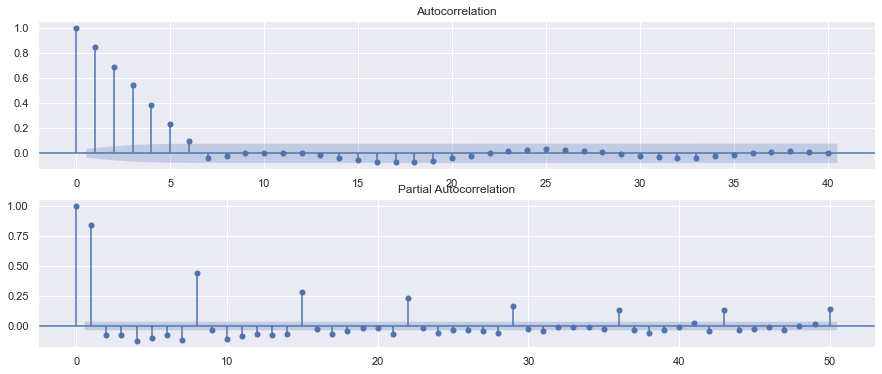

In [51]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
pyplot.figure()
pyplot.subplot(211)
plot_acf(ts_diff_logtrans, ax=pyplot.gca(), lags =40)
pyplot.subplot(212)
plot_pacf(ts_diff_logtrans, ax=pyplot.gca(), lags =50)
pyplot.show()

In [52]:
from statsmodels.tsa.arima_model import ARIMA

In [53]:
ts_diff_logtrans = ts_diff_logtrans.fillna(0)

/usr/local/Cellar/jupyterlab/3.0.0_1/libexec/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/Cellar/jupyterlab/3.0.0_1/libexec/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date

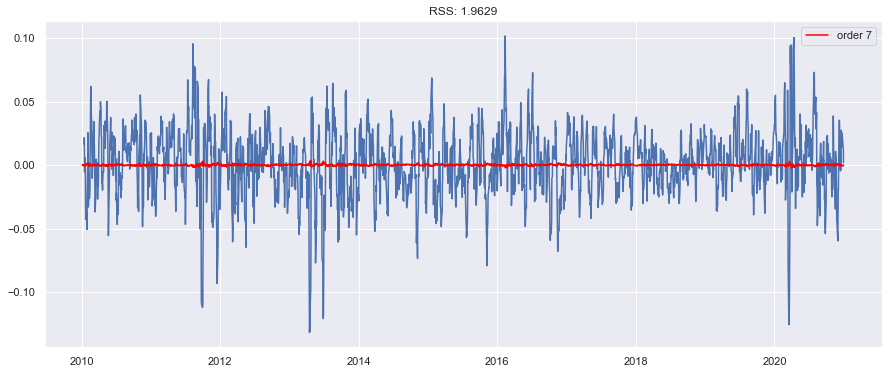

In [54]:
model = ARIMA(ts_logtransformed, order = (8,1,0))
result_AR = model.fit(disp=-1)
plt.plot(ts_diff_logtrans)
plt.plot(result_AR.fittedvalues, color = 'red', label = 'order 7')
RSS = result_AR.fittedvalues - ts_diff_logtrans
RSS.dropna(inplace = True)
plt.title("RSS: %.4f"%sum(RSS**2))
plt.legend(loc = 'best')

In [55]:
print(result_AR.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 2743
Model:                 ARIMA(8, 1, 0)   Log Likelihood                8651.432
Method:                       css-mle   S.D. of innovations              0.010
Date:                Thu, 25 Feb 2021   AIC                         -17282.863
Time:                        09:36:49   BIC                         -17223.695
Sample:                             1   HQIC                        -17261.484
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0002      0.000      1.084      0.278      -0.000       0.001
ar.L1.D.Close    -0.0272      0.019     -1.426      0.154      -0.065       0.010
ar.L2.D.Close     0.0014      0.019     

/usr/local/Cellar/jupyterlab/3.0.0_1/libexec/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/Cellar/jupyterlab/3.0.0_1/libexec/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date

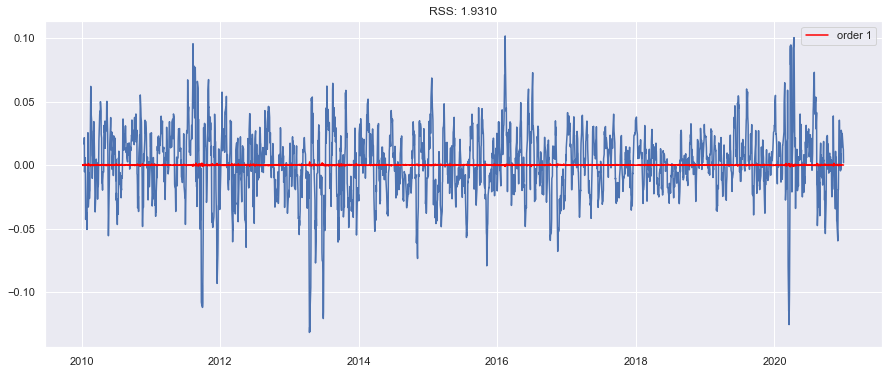

In [56]:
model = ARIMA(ts_logtransformed, order = (2,1,0))
result_AR = model.fit(disp=1)
plt.plot(ts_diff_logtrans)
plt.plot(result_AR.fittedvalues, color = 'red', label = 'order 1')
RSS = result_AR.fittedvalues - ts_diff_logtrans
RSS.dropna(inplace = True)
plt.title("RSS: %.4f"%sum(RSS**2))
plt.legend(loc = 'best')

In [57]:
print(result_AR.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 2743
Model:                 ARIMA(2, 1, 0)   Log Likelihood                8648.430
Method:                       css-mle   S.D. of innovations              0.010
Date:                Thu, 25 Feb 2021   AIC                         -17288.861
Time:                        09:36:55   BIC                         -17265.194
Sample:                             1   HQIC                        -17280.309
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0002      0.000      0.994      0.320      -0.000       0.001
ar.L1.D.Close    -0.0256      0.019     -1.341      0.180      -0.063       0.012
ar.L2.D.Close     0.0022      0.019     

/usr/local/Cellar/jupyterlab/3.0.0_1/libexec/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/Cellar/jupyterlab/3.0.0_1/libexec/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date

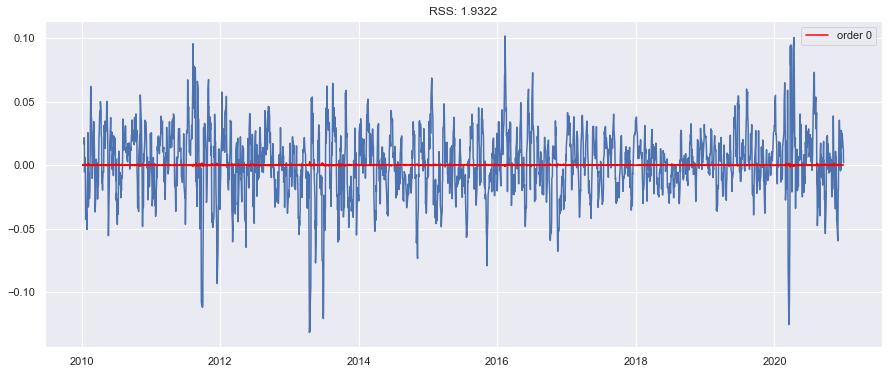

In [58]:
model = ARIMA(ts_logtransformed, order = (1,1,0))
result_AR = model.fit(disp=1)
plt.plot(ts_diff_logtrans)
plt.plot(result_AR.fittedvalues, color = 'red', label = 'order 0')
RSS = result_AR.fittedvalues - ts_diff_logtrans
RSS.dropna(inplace = True)
plt.title("RSS: %.4f"%sum(RSS**2))
plt.legend(loc = 'best')

In [59]:
print(result_AR.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 2743
Model:                 ARIMA(1, 1, 0)   Log Likelihood                8648.424
Method:                       css-mle   S.D. of innovations              0.010
Date:                Thu, 25 Feb 2021   AIC                         -17290.847
Time:                        09:37:00   BIC                         -17273.097
Sample:                             1   HQIC                        -17284.433
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0002      0.000      0.996      0.319      -0.000       0.001
ar.L1.D.Close    -0.0257      0.019     -1.345      0.179      -0.063       0.012
                                    Root

/usr/local/Cellar/jupyterlab/3.0.0_1/libexec/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/Cellar/jupyterlab/3.0.0_1/libexec/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date

Text(0.5, 1.0, 'RSS: 1.9322')

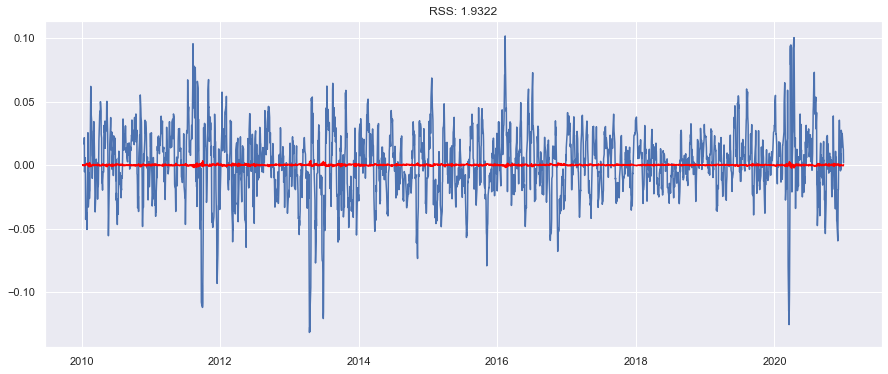

In [60]:
model = ARIMA(ts_logtransformed, order = (0,1,6))
result_MA = model.fit(disp=-1)
plt.plot(ts_diff_logtrans)
plt.plot(result_MA.fittedvalues, color = 'red', label = 'order 6')
RSS = result_AR.fittedvalues - ts_diff_logtrans
RSS.dropna(inplace = True)
plt.title("RSS: %.4f"%sum(RSS**2))
#plt.legend(loc = 'best')

In [61]:
print(result_MA.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 2743
Model:                 ARIMA(0, 1, 6)   Log Likelihood                8650.570
Method:                       css-mle   S.D. of innovations              0.010
Date:                Thu, 25 Feb 2021   AIC                         -17285.140
Time:                        09:37:01   BIC                         -17237.805
Sample:                             1   HQIC                        -17268.036
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0002      0.000      1.054      0.292      -0.000       0.001
ma.L1.D.Close    -0.0274      0.019     -1.434      0.152      -0.065       0.010
ma.L2.D.Close     0.0015      0.019     

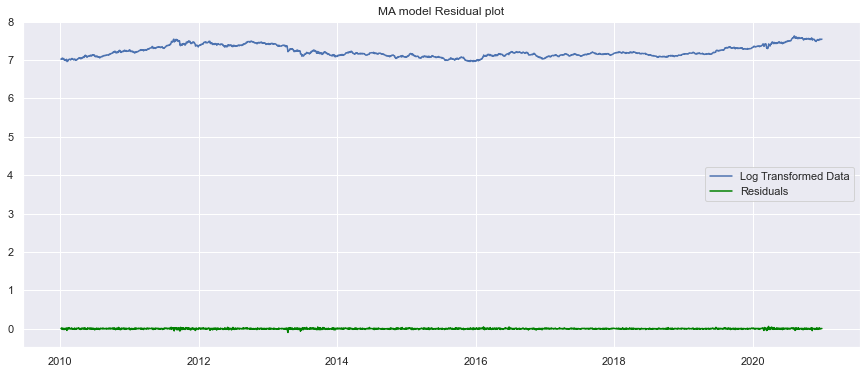

In [62]:
plt.plot(ts_logtransformed, label = 'Log Transformed Data')
plt.plot(result_MA.resid, color = 'green', label = 'Residuals')
plt.title('MA model Residual plot')
plt.legend(loc = 'best')

count    2.743000e+03
mean     4.223070e-07
std      1.033266e-02
min     -9.902479e-02
25%     -4.753279e-03
50%      9.051093e-05
75%      5.435549e-03
max      5.892074e-02
dtype: float64


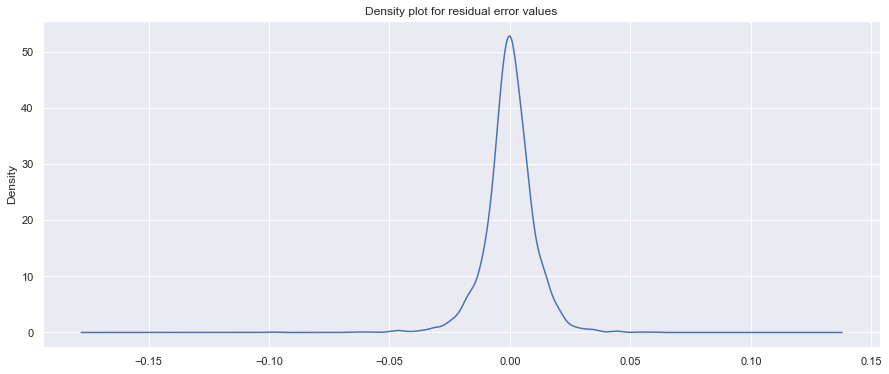

In [63]:
result_MA.resid.plot(kind = 'kde')
plt.title('Density plot for residual error values')
print(result_MA.resid.describe())

/usr/local/Cellar/jupyterlab/3.0.0_1/libexec/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/Cellar/jupyterlab/3.0.0_1/libexec/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date

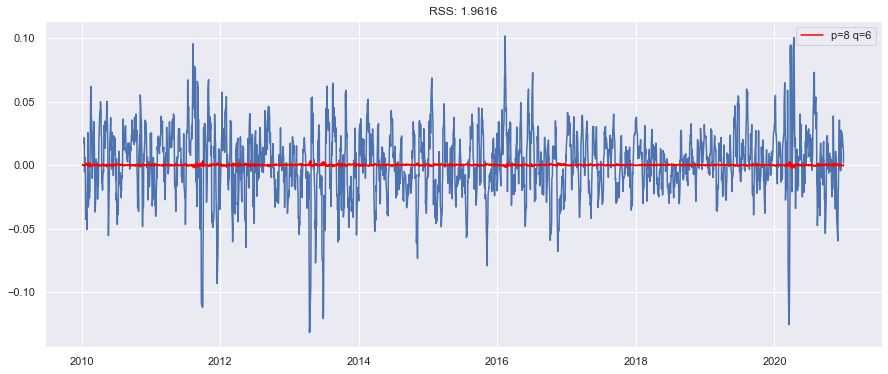

In [64]:
model = ARIMA(ts_logtransformed, order = (8,1,6))
result_ARIMA = model.fit(trend = 'nc',disp=-1)
plt.plot(ts_diff_logtrans)
plt.plot(result_MA.fittedvalues, color = 'red', label = 'p=8 q=6')
RSS = result_ARIMA.fittedvalues - ts_diff_logtrans
RSS.dropna(inplace = True)
plt.title("RSS: %.4f"%sum(RSS**2))
plt.legend(loc = 'best')

In [65]:
print(result_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 2743
Model:                 ARIMA(8, 1, 6)   Log Likelihood                8656.306
Method:                       css-mle   S.D. of innovations              0.010
Date:                Thu, 25 Feb 2021   AIC                         -17282.612
Time:                        09:37:22   BIC                         -17193.859
Sample:                             1   HQIC                        -17250.542
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
ar.L1.D.Close    -0.8159      0.351     -2.323      0.020      -1.504      -0.127
ar.L2.D.Close    -1.0516      0.335     -3.137      0.002      -1.709      -0.394
ar.L3.D.Close    -0.3340      0.474     

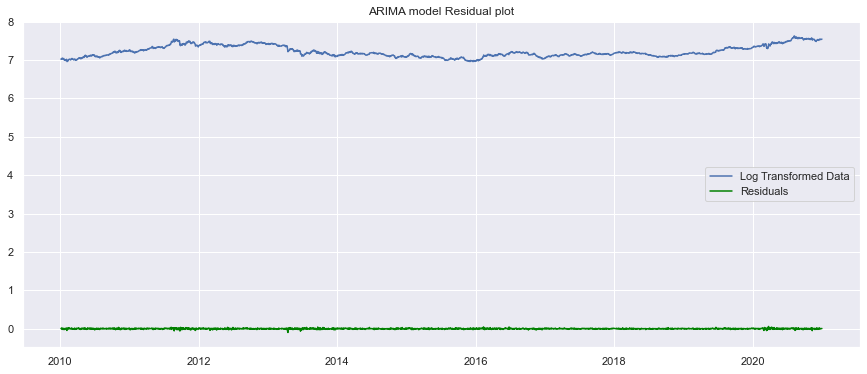

In [66]:
plt.plot(ts_logtransformed, label = 'Log Transformed Data')
plt.plot(result_ARIMA.resid, color = 'green', label = 'Residuals')
plt.title('ARIMA model Residual plot')
plt.legend(loc = 'best')

count    2743.000000
mean        0.000208
std         0.010309
min        -0.098448
25%        -0.004530
50%         0.000354
75%         0.005592
max         0.058399
dtype: float64


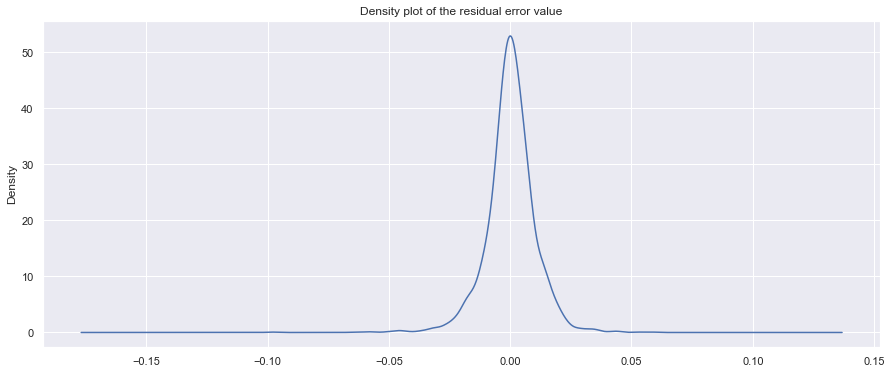

In [67]:
result_ARIMA.resid.plot(kind = 'kde')
plt.title('Density plot of the residual error value')
print(result_ARIMA.resid.describe())

In [68]:
test = pd.read_csv("/Users/priyaramasamy/Downloads/GC=F.csv",index_col='Date')
test.index = pd.to_datetime(test.index)
test = test['Close']
test = test.sort_index()
test

Date
2010-01-04    1117.699951
2010-01-05    1118.099976
2010-01-06    1135.900024
2010-01-07    1133.099976
2010-01-08    1138.199951
                 ...     
2020-12-24            NaN
2020-12-27            NaN
2020-12-28    1877.199951
2020-12-29    1879.699951
2020-12-30    1891.000000
Name: Close, Length: 3342, dtype: float64

In [69]:
print(test[0])

1117.699951


In [70]:
test_data = test.dropna()

In [71]:
test_data.shape

(2744,)

In [72]:
test_data

Date
2010-01-04    1117.699951
2010-01-05    1118.099976
2010-01-06    1135.900024
2010-01-07    1133.099976
2010-01-08    1138.199951
                 ...     
2020-12-22    1866.599976
2020-12-23    1874.699951
2020-12-28    1877.199951
2020-12-29    1879.699951
2020-12-30    1891.000000
Name: Close, Length: 2744, dtype: float64

In [73]:
prediction_ARIMA_diff = pd.Series(result_ARIMA.fittedvalues, copy = True)
print(prediction_ARIMA_diff.head())

Date
2010-01-05    0.000000
2010-01-06   -0.000009
2010-01-07   -0.000398
2010-01-08    0.000109
2010-01-11   -0.000008
dtype: float64


In [74]:
prediction_ARIMA_diff_cumsum = prediction_ARIMA_diff.cumsum()
print(prediction_ARIMA_diff_cumsum.head())

Date
2010-01-05    0.000000
2010-01-06   -0.000009
2010-01-07   -0.000407
2010-01-08   -0.000298
2010-01-11   -0.000306
dtype: float64


In [75]:
predictions_ARIMA_log = pd.Series(ts_logtransformed.iloc[0], index = ts_logtransformed.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(prediction_ARIMA_diff_cumsum,fill_value = 0)
predictions_ARIMA_log.head()

Date
2010-01-04    7.019028
2010-01-05    7.019028
2010-01-06    7.019019
2010-01-07    7.018621
2010-01-08    7.018730
dtype: float64

Text(0.5, 1.0, 'RMSE: 365.8672')

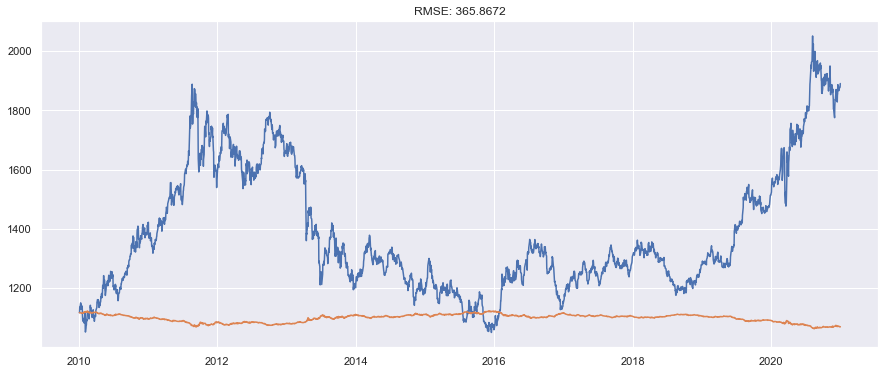

In [76]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(data)
plt.plot(predictions_ARIMA)
plt.title("RMSE: %.4f"%np.sqrt(sum((predictions_ARIMA - data)**2)/len(data)))

In [77]:
dates = [pd.Timestamp('2021-02-15'),pd.Timestamp('2021-02-16'),pd.Timestamp('2021-02-17'),pd.Timestamp('2021-02-18'),pd.Timestamp('2021-02-19')]

forecast = pd.Series(result_ARIMA.forecast(steps= 5)[0], dates)
print(forecast)
forecast = np.exp(forecast)
print(forecast)

2021-02-15    7.545183
2021-02-16    7.545581
2021-02-17    7.545607
2021-02-18    7.544848
2021-02-19    7.544327
dtype: float64
2021-02-15    1891.609668
2021-02-16    1892.362095
2021-02-17    1892.411369
2021-02-18    1890.974915
2021-02-19    1889.990330
dtype: float64


In [78]:
from sklearn.metrics import mean_squared_error

In [79]:
#y_true = test
#y_pred = forecast
#error = mean_squared_error(y_true,y_pred)
#print('Test MSE: %.3f' %error)

In [80]:
#test.shape

In [81]:
#forecast.shape

In [82]:
prediction_MA_diff = pd.Series(result_MA.fittedvalues, copy = True)
print(prediction_MA_diff.head())

Date
2010-01-05    0.000191
2010-01-06    0.000187
2010-01-07   -0.000222
2010-01-08    0.000275
2010-01-11    0.000200
dtype: float64


In [83]:
prediction_MA_diff_cumsum = prediction_MA_diff.cumsum()
print(prediction_MA_diff_cumsum.head())

Date
2010-01-05    0.000191
2010-01-06    0.000378
2010-01-07    0.000156
2010-01-08    0.000432
2010-01-11    0.000631
dtype: float64


In [84]:
prediction_MA_log = pd.Series(ts_logtransformed.iloc[0], index = ts_logtransformed.index)
prediction_MA_log = prediction_MA_log.add(prediction_MA_diff_cumsum, fill_value=0)
prediction_MA_log.head()

Date
2010-01-04    7.019028
2010-01-05    7.019219
2010-01-06    7.019406
2010-01-07    7.019185
2010-01-08    7.019460
dtype: float64

Text(0.5, 1.0, 'RMSE: 330.8594')

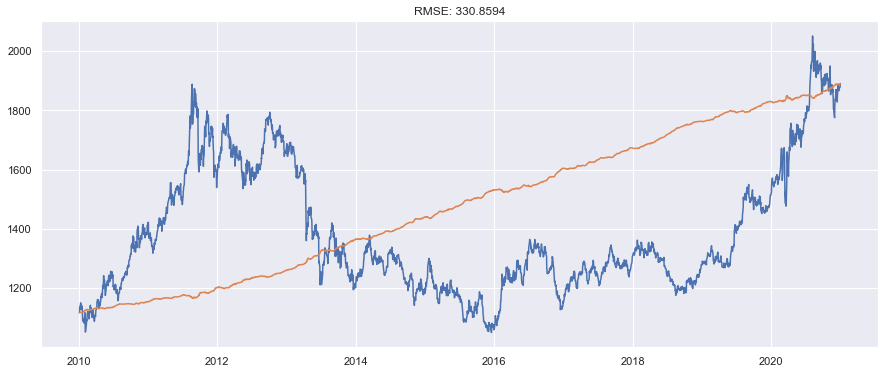

In [85]:
prediction_MA = np.exp(prediction_MA_log)
plt.plot(data)
plt.plot(prediction_MA)
plt.title('RMSE: %.4f'% np.sqrt(sum((prediction_MA - data)**2)/len(data)))

In [86]:
dates = [pd.Timestamp('2021-02-15'),pd.Timestamp('2021-02-16'),pd.Timestamp('2021-02-17'),pd.Timestamp('2021-02-18'),pd.Timestamp('2021-02-19')]

forecast = pd.Series(result_MA.forecast(steps= 5)[0], dates)
print(forecast)
forecast = np.exp(forecast)
print(forecast)

2021-02-15    7.545124
2021-02-16    7.545313
2021-02-17    7.545388
2021-02-18    7.545421
2021-02-19    7.545612
dtype: float64
2021-02-15    1891.496335
2021-02-16    1891.854828
2021-02-17    1891.996740
2021-02-18    1892.058472
2021-02-19    1892.420113
dtype: float64


In [87]:
from sklearn.metrics import mean_squared_error

In [88]:
#y_true = test
#y_pred = forecast
#error = mean_squared_error(y_true,y_pred)
#print('Test MSE: %.3f' %error)

In [89]:
#test.shape

In [90]:
#test.shape

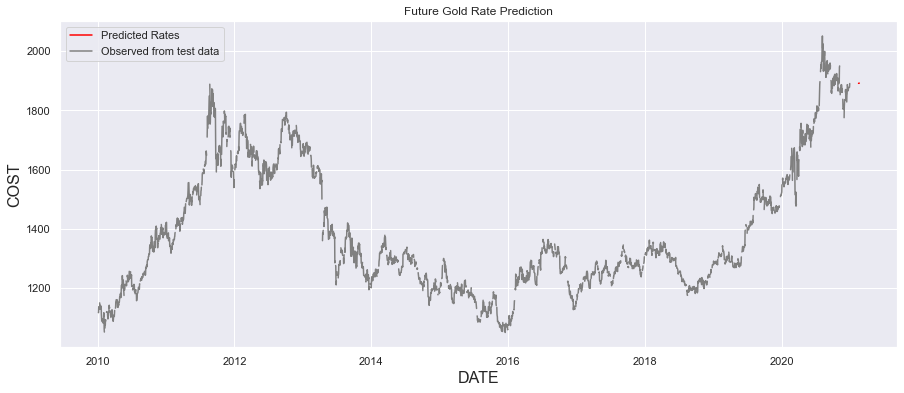

In [91]:
plt.plot(forecast, color = 'red', label = 'Predicted Rates')
plt.plot(test, color ='gray', label = 'Observed from test data')
plt.title('Future Gold Rate Prediction')
plt.ylabel('COST',fontsize = 16)
plt.xlabel('DATE',fontsize = 16)
plt.legend(loc = 'best')